In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Predicting Restaurant Revenue
This is my second Kaggle competition. The goal is to predict a restaurant's revenue based on a number of factors. This competition has some money riding on it ($10,000) so it will be pretty competitive. Let's see how I do.

In [67]:
df = pd.read_csv('../../../../WorkLocal/Kaggle/restaurant_2015_data/train.csv')

There are a few dozen columns (P1-P37) containing obfuscated data. These don't appear to be dummy coded. I'm going to leave these alone for now and take a look at the opening data, city size, restaurant type, and city.

###Open date
I will take the earliest date that a restaurant opened and look at revenues of restaurants as a function of the duration of time since that first date.

In [68]:
import datetime
dates = []
new_dates = []
for i in df['Open Date']:
    d=i.split('/')
    dates.append(datetime.datetime(int(d[2]), int(d[0]), int(d[1])))

min_date = min(dates)
for j in dates:
    new_dates.append((j - min_date).total_seconds())

df['Open Date'] = (np.array(new_dates)/ max(new_dates))


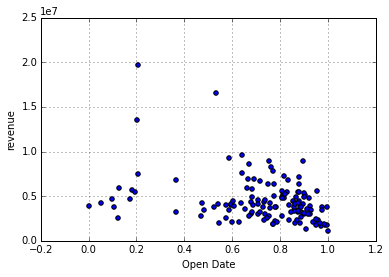

In [69]:
df.plot(kind='scatter', x='Open Date', y='revenue')
plt.show()

###City group:
City group is a binary variable: it is either a big city or other.

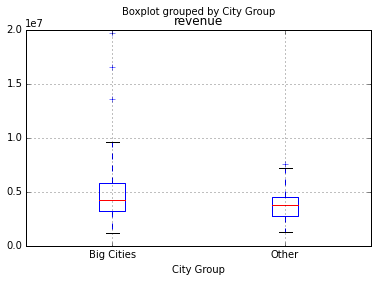

In [70]:
df.boxplot(column='revenue', by='City Group')

###Restaurant type:

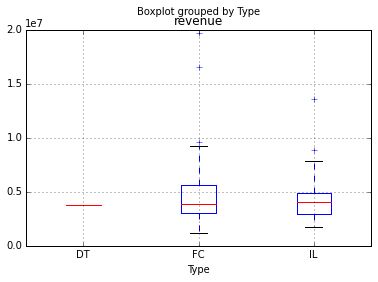

In [71]:
df.boxplot(column='revenue', by='Type')

###City:

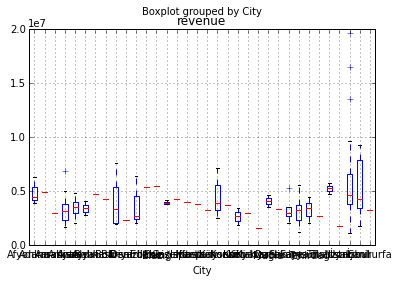

In [72]:
df.boxplot(column='revenue', by='City')

I'm not seeing a whole lot to go on with these features. Maybe I will just start off with a regularized regression and see what happens.

##Shotgun approach:

In [64]:
cg = pd.get_dummies(df['City Group'], prefix='city_group')
df = df.drop(['City Group'], axis=1)
df = pd.concat([df, cg], axis=1)

t = pd.get_dummies(df['Type'], prefix='type')
df = df.drop(['Type'], axis=1)
df = pd.concat([df, t], axis=1)

c = pd.get_dummies(df['City'], prefix='city')
df = df.drop(['City'], axis=1)
df = pd.concat([df, cg], axis=1)